Epoch 0: Loss = 0.6948, Accuracy = 0.5000
Epoch 10: Loss = 0.6907, Accuracy = 0.4688
Epoch 20: Loss = 0.6874, Accuracy = 0.5781
Epoch 30: Loss = 0.6847, Accuracy = 0.5625
Epoch 40: Loss = 0.6824, Accuracy = 0.5312
Epoch 50: Loss = 0.6803, Accuracy = 0.5469
Epoch 60: Loss = 0.6786, Accuracy = 0.5469
Epoch 70: Loss = 0.6766, Accuracy = 0.5625
Epoch 80: Loss = 0.6750, Accuracy = 0.5625
Epoch 90: Loss = 0.6733, Accuracy = 0.5625


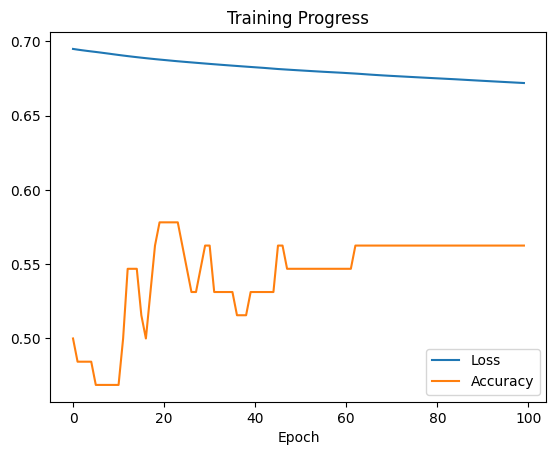

Accuracy: 0.5625


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Define a simple MLP model
class MLPClassifier(nn.Module):
    def __init__(self, in_dim=2, h_dim=3, out_dim=1):
        super().__init__()
        self.hidden = nn.Linear(in_dim, h_dim)
        self.output = nn.Linear(h_dim, out_dim)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

# 2. Initialize model, loss, optimizer
model = MLPClassifier()
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 3. Dummy data: 64 samples, 2D input, binary labels
torch.manual_seed(123)
x = torch.randn(64, 2)
y = torch.randint(0, 2, (64, 1)).float()

# 4. Training loop
epochs = 100
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = criterion(y_pred, y)
    loss_history.append(loss.item())

    # Backward pass and weight update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Accuracy check
    with torch.no_grad():
        predicted_labels = (y_pred > 0.5).float()
        accuracy = (predicted_labels == y).float().mean()
        accuracy_history.append(accuracy.item())

    # Print every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Accuracy = {accuracy.item():.4f}")

# 5. Plot loss and accuracy
plt.plot(loss_history, label='Loss')
plt.plot(accuracy_history, label='Accuracy')
plt.xlabel('Epoch')
plt.title('Training Progress')
plt.legend()
plt.show()

# 6. Final prediction
# Final prediction using best model
with torch.no_grad():
    y_pred = model(x)                          # Get predicted probabilities
    y_pred_labels = (y_pred > 0.5).float()     # Convert to binary labels (0 or 1)

    accuracy = (y_pred_labels == y).float().mean()
    print(f"Accuracy: {accuracy.item():.4f}")



In [8]:
torch.mean(y)

tensor(0.5000)